# Naiver Algorithmus für min makespan

In diesem Notebook wird der naive Aufzählungsalgorithmus für *min makespan* illustriert. 

Dieses Notebook ist sehr viel ausführlicher als sonst, da ich nebenbei versuche ein wenig Python zu erklären. Deutlich mehr erfahren Sie unter https://python.org

Wie funktioniert der naive Algorithmus? Wir listen einfach alle möglichen Zuteilungen der Aufträge an die beiden Maschinen auf. Da wir nur zwei Maschinen haben, ist das das gleiche wie die Auflistung aller 0,1-Vektoren der Länge $n$, wobei $n$ gleich der Anzahl der Aufträge ist. 

Das Hochzählen erfolgt mit einer for-Schleife, zusammen mit dem <code>range</code>-Operator. Der erzeugt einfach eine Liste von Zahlen. Probieren wir ihn aus. Vergessen Sie nicht die Zelle auszuführen, indem Sie etwa das *play*-Symbol anklicken. 

In [1]:
# intern wird aus range(6) erst eine Liste, wenn dies nötig ist -- dies ist aus Performance-Gründen so
# wenn wir die Liste explizit sehen wollen, müssen wir dies mit "list"-Befehl ansagen
list(range(6))

[0, 1, 2, 3, 4, 5]

Listen in Python sind durch eckige Klammern definiert. Die einzelnen Listen-Elemente können wie in vielen anderen Programmiersprachen ebenfalls mit eckigen Klammern addressiert werden. In Python-Listen kann man alles mögliche hinein tun:

In [2]:
meine_Liste=[42,'blubb',2.3455,'blubb blubb']
meine_Liste[1]

'blubb'

In [3]:
meine_Liste[3]=1234567
meine_Liste

[42, 'blubb', 2.3455, 1234567]

Im Gegensatz zu java muss eine Variable nicht vorher deklariert werden, sondern kann sofort verwandt werden. Die Variablen haben auch keinen Typ -- in jede Variable können beliebige Objekte geschrieben werden.

Listen können einfach mit dem for-Operator befüllt werden. Zwei Sterne wie in <code>7**3</code> übersetzen sich in $7^3$, also $7\times 7\times 7$.

In [4]:
noch_eine_Liste=[a**2 for a in range(5)]
noch_eine_Liste

[0, 1, 4, 9, 16]

Nun erzeugen wir alle 0,1-Vektoren und stellen die als Liste dar. Python benutzt Einrückungen zum Strukturieren. Dh alle Zeilen unter <code>for</code>, die eingerückt sind, gehören zur <code>for</code>-Schleife. 

Zudem nutzen wir ein wenig Bitoperatoren. Insbesondere den Operator <code>&</code>, der ein bitweises *und* gibt. D.h. <code>5 & 12</code> ergibt <code>4</code>, da sowohl in 5 als auch in 12 das 4-Bit in der Binärschreibweise gesetzt ist (aber die beiden Zahlen sonst keine gemeinsamen Bits haben). 

In [5]:
number_of_jobs=4
for b in range(2**number_of_jobs):   
    # das folgende sind Bit-Operationen, die nicht wirklich wichtig sind
    # falls Sie dennoch wissen möchten, was passiert:
    # & ist der bitweise Und-Operator, dh es wird überprüft, ob das i. Bit gesetzt ist
    # die Ausgabe von 7 & 2^2 ist allerdings 4 -- damit eine 1 draus wird, teile ich durch 4
    # normalerweise teilt man in python so: 4/4
    # das Ergebnis ist jedoch eine Gleitkommazahl 4/4=1.0
    # um den störenden Punkt zu entfernen, mache ich stattdessen Ganzzahlteilen, mit einem doppelten backslash
    a=[(b & 2**i)//2**i for i in range(number_of_jobs)]  
    print(a)

[0, 0, 0, 0]
[1, 0, 0, 0]
[0, 1, 0, 0]
[1, 1, 0, 0]
[0, 0, 1, 0]
[1, 0, 1, 0]
[0, 1, 1, 0]
[1, 1, 1, 0]
[0, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 0, 1]
[1, 1, 0, 1]
[0, 0, 1, 1]
[1, 0, 1, 1]
[0, 1, 1, 1]
[1, 1, 1, 1]


## Zufallsinstanzen 

Als nächstes wollen wir Zufallsinstanzen erzeugen. Jede Zufallsinstanz soll dabei einfach eine Liste <code>[5, 10, 5, 1, 6, 7, 8, 7, 3, 9]</code> von Job-Dauern sein. (Wir gehen davon aus, dass jeder Auftrag die gleiche Bearbeitungsdauer auf den beiden Maschinen hat, die Maschinen also identisch sind. 

Um Zufallszahlen zu erzeugen, brauchen wir das <code>random</code>-Paket von Python. Dass wir <code>random</code> benutzen wollen, sagen wir Python so: <code>import random</code>. Da wir später noch das Paket <code>math</code> brauchen, importieren wir das gleich auch:

In [6]:
import random
import math

Das Paket <code>random</code> hat eine Methode <code>randint(a,b)</code>, die eine zufällige ganze Zahl zwischen <code>a</code> und <code>b</code> erzeugt. Da die Methode in dem Paket <code>random</code> enthalten ist, müssen wir das Paket ebenfalls benennen und einen Punkt zwischen Paket und Methode setzen:

In [7]:
random.randint(2,7)

4

Zur späteren Verwendung definieren wir eine Methode (in anderen Programmiersprachen Funktion genannt). Dies geschieht mit dem Schlüsselwort <code>def</code>. In der Klammer können wir die Parameter der Methode angeben. Hier: wie viele zufällige Auftragdauern wir haben wollen.

In [8]:
def random_makespan_instance(number_of_jobs):
    job_lengths=[random.randint(1,10) for i in range(number_of_jobs)]
    return job_lengths  # return gibt den Rückgabewert der Methode an

# beachten Sie: die folgenden Zeilen sind nicht eingerückt und gehören daher nicht zur Methode
# wir testen die Methode gleich
job_lengths=random_makespan_instance(10)
job_lengths

[9, 10, 3, 8, 5, 1, 1, 8, 5, 2]

Wunderbar, nun können wir Zufallsinstanzen erzeugen. 

## Beste Job-Zuteilung

Listen wir also nun alle Zuteilungen auf und wählen eine mit kleinstem makespan aus. Dazu müssen wir die Last auf beiden Maschinen berechnen. Die Last auf der ersten Machine speichern wir in die Variable <code>T1</code> und die der zweiten in <code>T2</code>. Um die Last zu berechnen, nutzen wir eine weitere Eigenschaft von Python: Bei der Erzeugung von Listen kann man filtern.

In [9]:
Liste_ohne_Filter=[i for i in range(10)]
Liste_ohne_Filter

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [10]:
# Der %-Operator gibt den Rest an, dh i%2 ergibt 0, wenn i gerade ist und sonst 1
# wir filter nun mit "if" nur die geraden Zahlen heraus
Liste_mit_Filter=[i for i in range(10) if i%2==0]
Liste_mit_Filter

[0, 2, 4, 6, 8]

Den besten makespan, den wir bisher gefunden haben, speichern wir in der Variable <code>T_best</code>, die beste Zuteilung in <code>a_best</code>.

In [11]:
def find_best(job_lengths):
    T_best=math.inf  # wir setzen anfangs den besten makespan auf unendlich
    a_best=None      # None ist ein Python-Konstrukt, das als Marker dient, dass die Variable nicht belegt ist -- könnte hier weggelassen werden
    number_of_jobs=len(job_lengths)
    for b in range(2**number_of_jobs):
        # wie oben erzeugen wir aus b eine Liste a mit 0,1-Werten
        a=[(b & 2**i)//2**i for i in range(number_of_jobs)]
        # nun berechnen wir die Last auf den beiden Maschinen
        # Maschine 1 bekommt all die Aufträge, bei denen die Liste a einen 0-Eintrag hat
        T1=sum([job_lengths[i] for i in range(number_of_jobs) if a[i]==1])
        T2=sum([job_lengths[i] for i in range(number_of_jobs) if a[i]==0])
        # der makespan der Zuteilung ist nun gleich dem Maximum von T1 und T2
        # wir überprüfen, ob die momentane Zuteilung besser ist, als die bisher beste
        if T_best>max(T1,T2):
                T_best=max(T1,T2)
                a_best=a
    return a_best,T_best

a_best,T_best=find_best(job_lengths)
# format ermöglicht einfache Ausgaben
# die Werte a_best und T_best werden an den Stellen, die mit {} markiert sind, eingefüllt
print("beste Zuteilung {} mit makespan {}".format(a_best,T_best))

beste Zuteilung [0, 1, 1, 1, 1, 0, 0, 0, 0, 0] mit makespan 26


## Zeitmessungen

Wir gucken nun noch, wie lange der Algorithmus für verschiedene Anzahlen an Aufträgen braucht. Dazu importieren wir ebenfalls das Paket <code>matplotlib.pyplot</code>, das das Plotten von Graphen ermöglicht. Weil <code>matplotlib.pyplot</code> recht lang ist, sagen wir Python, dass das Paket zu <code>plt</code> abgekürzt werden soll.

Wenn Sie dieses Notebook in Colab ausführen, dann ist <code>matplotlib</code> bereits installiert. Wenn Sie den Code auf Ihrem eigenen Rechner ausführen, dann mag es sein, dass Sie das Paket erst installieren müssen. Mit Anaconda funktioniert dies so: <code>conda install matplotlib</code> (in einem Terminalfenster, bzw. Eingabeaufforderung (??) in Windows). Mit einer herkömmlichen Python-Distribution nutzen Sie <code>pip</code> wie folgt: <code>pip install matplotlib</code> (wieder in einem Terminalfenster).

In [12]:
import matplotlib.pyplot as plt # fürs plotten
import time # für die Zeitmessungen

Im folgenden nutzen wir noch einen weiteren nützlichen Befehl, nämlich <code>append</code>. Mit <code>append</code> kann man ein Element am Ende einer Liste hinzufügen:

In [13]:
Liste=["etwas",42,"noch etwas"]
Liste.append("etwas ganz am Ende")
Liste

['etwas', 42, 'noch etwas', 'etwas ganz am Ende']

In [14]:
repeats=3   # wir wiederholen jede Messung, um ein wenig statistische Sicherheit zu erlangen
times=[]    # hier speichern wir die Laufzeiten rein
list_of_number_of_jobs=range(14,20,1)
for number_of_jobs in list_of_number_of_jobs:
    timesum=0
    for r in range(repeats):
        job_lengths=random_makespan_instance(number_of_jobs)
        start=time.time()    # ...und die Zeit läuft
        find_best(job_lengths)
        end=time.time()      # Stoppuhr wieder angehalten
        timesum+=end-start
    # der Befehl "append" hängt einfach einen Eintrag ans Ende einer Liste. 
    times.append(timesum/repeats)  

In [15]:
times

[0.20178397496541342,
 0.3773485819498698,
 0.7365543842315674,
 1.527830680211385,
 3.242058833440145,
 6.9090181191762285]

Plotten wir das einmal, damit's anschaulicher wird. Der plot-Befehl braucht x- und y-Werte:

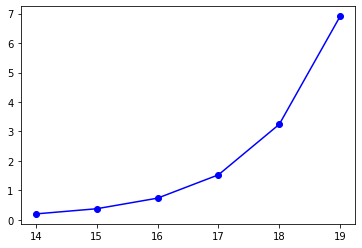

In [16]:
plt.plot(list_of_number_of_jobs,times,"bo-")

Ein wunderbarer exponentieller Anstieg.